In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [81]:
data = pd.read_csv("~/catkin_ws/src/Turtlebot3_Pheromone/src/log/csv/rl_4_20210201-221707_traj.csv")

In [82]:
print(data)
num = 4
new_data = [None]*num
for i in range(num):
    new_data[i] = data[data["ID"] == i]
    new_data[i] = new_data[i][["time","ID", "x", "y"]]


    time  ID     x     y
0    0.1   0  1.90  0.62
1    0.1   1 -1.90 -0.62
2    0.1   2 -0.62  1.90
3    0.1   3  0.62 -1.90
4    0.6   0  1.81  0.58
5    0.6   1 -1.83 -0.59
6    0.6   2 -0.59  1.83
7    0.6   3  0.59 -1.82
8    1.2   0  1.63  0.42
9    1.2   1 -1.67 -0.54
10   1.2   2 -0.48  1.65
11   1.2   3  0.46 -1.63
12   1.7   0  1.46  0.20
13   1.7   1 -1.44 -0.40
14   1.7   2 -0.22  1.51
15   1.7   3  0.23 -1.48
16   2.3   0  1.27 -0.02
17   2.3   1 -1.23 -0.21
18   2.3   2  0.06  1.32
19   2.3   3  0.00 -1.29
20   2.9   0  1.06 -0.18
21   2.9   1 -1.03 -0.03
22   2.9   2  0.21  1.05
23   2.9   3 -0.19 -1.02
24   3.4   0  0.84 -0.35
25   3.4   1 -0.83  0.11
26   3.4   2  0.30  0.79
27   3.4   3 -0.32 -0.77
28   4.0   0  0.57 -0.48
29   4.0   1 -0.60  0.25
..   ...  ..   ...   ...
34   4.5   2  0.38  0.34
35   4.5   3 -0.48 -0.26
36   5.0   0  0.05 -0.57
37   5.0   1 -0.16  0.42
38   5.0   2  0.49  0.12
39   5.0   3 -0.62  0.05
40   5.6   0 -0.21 -0.67
41   5.6   1  0.11  0.49


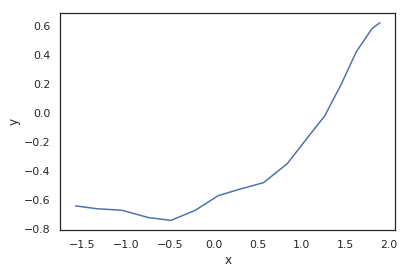

In [83]:
sns.set(style="white")
traj_plot = sns.lineplot(data=new_data[0], x="x", y="y")

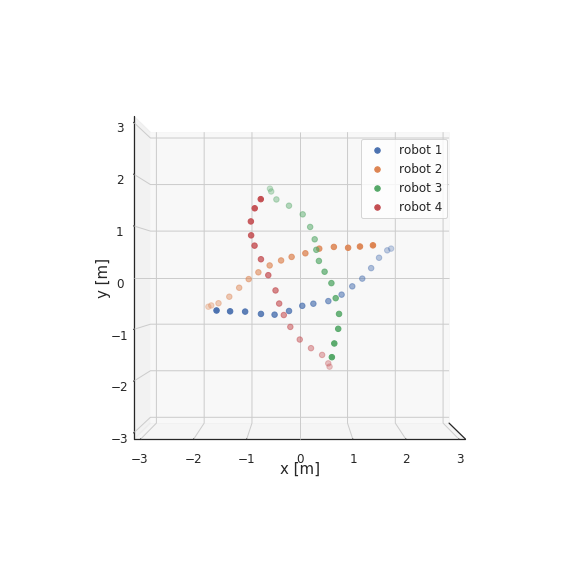

In [84]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
x = new_data[0]['time']
y = new_data[0]['x']
z = new_data[0]['y']

x2 = new_data[1]['time']
y2 = new_data[1]['x']
z2 = new_data[1]['y']

x3 = new_data[2]['time']
y3 = new_data[2]['x']
z3 = new_data[2]['y']

x4 = new_data[3]['time']
y4 = new_data[3]['x']
z4 = new_data[3]['y']




#ax.set_xlabel("time")
ax.set_ylabel("x [m]", fontsize = 15)
ax.set_zlabel("y [m]", fontsize = 15)

fig.set_figheight(10)
fig.set_figwidth(10)


ax.scatter(x, y, z, label="robot 1", s=30)
ax.scatter(x2, y2, z2, label="robot 2", s=30)
ax.scatter(x3, y3, z3, label="robot 3", s=30)
ax.scatter(x4, y4, z4, label="robot 4", s=30)

ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
#ax.set_top_view()
ax.view_init(0,0)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.legend(loc='upper center',bbox_to_anchor=(0.70, 0.780), fontsize=12)

#plt.gca().axes.get_xaxis().set_visible(False)
plt.xticks([])
plt.show()

In [85]:
from math import *
# Calculate the distance of trajectories
x_arr = [None]*num
y_arr = [None]*num
x = [None]*num
y = [None]*num
traj_dist = [0.0]*num
euclidean_dist = [0.0]*num
for i in range(num):
    x_arr[i] = new_data[i]["x"]
    y_arr[i] = new_data[i]["y"]
    x[i] = x_arr[i].to_numpy()
    y[i] = y_arr[i].to_numpy()
#print(x)
#print(y)
#print(len(new_data[0])-1)
for i in range(len(new_data[0])-1):
    for j in range(num):
        #print(x_arr[j])
        traj_dist[j] += sqrt((x[j][i]-x[j][i+1])**2+(y[j][i]-y[j][i+1])**2)
        

for j in range(num):
    #print(x_arr[j])
    euclidean_dist[j] += sqrt((x[j][0]-x[j][-1])**2+(y[j][0]-y[j][-1])**2)
print(traj_dist)
print(euclidean_dist)
print(np.average(np.array(euclidean_dist)/np.array(traj_dist)))



[3.9405544594983617, 3.6284754558068055, 3.9452544371217155, 3.970033261344126]
[3.7010809231898727, 3.5194601858807837, 3.662703919237808, 3.689783191462609]
0.9417437272854632
